# Selamat datang dalam Ujian Deep Learning Image

Tugas kalian adalah untuk melakukan analisis dasar untuk membangun Deep Learning di Image Proccessing. Adapun  data set yang digunakan adalah Fashion MNIST. 


Aturan ujian:
1. **Boleh melihat catatan dan internet**
2. **Penamaan file:**:
     
     - Nama File dirubah menjadi #Nama#Waktu#-Ujian-Deep-Learning.ipynb menjadi:
         - Andreas-24Feb2019-Deep-Learning.ipynp
         
3. Ujian Dilakukan pada hari ini dan diselesaikan dalam waktu 1.5 jam

Adapun komponen penilaian pada ujian ini adalah:


1. **Data pre-processing**  
     1.1. Memuat Data  
     1.2. Memeriksa Bentuk dan Tipe Data  
     1.3. Ekstraksi x_train dan y_train  
     1.4. Visualisasi  
     1.5. Normalisasi  
     1.6. Menyesuaikan Shape dari Dataset  
     1.7. One-Hot Encoding  
     1.8. Memisahkan Data Training dan Data Validation      
      
2. **Convolutional Neural Network**  
    

3. **Analisis Hasil**  .Melakukan Visualisasi / Plotting Loss dan Accuracy  
    

<hr>

# 1. Data Preprocessing

-- silahkan tuliskan analisa kalian

In [56]:
#meng-import library yang akan digunakan
import numpy as np # linear algebra, matrix multiplications
import pandas as pd # data processing, CSV file I/O

## 1.1 Memuat Data
-- silahkan tuliskan analisa kalian

In [57]:
#meng-input & define pada gambar 
train = pd.read_csv("../input-ujian/fashion-mnist_train.csv")
test = pd.read_csv("../input-ujian/fashion-mnist_test.csv")

## 1.2 Memeriksa Bentuk dan Tipe Data
-- silahkan tuliskan analisa kalian

### Memeriksa Tipe Data

In [58]:
# memeriksa tipe data 
print('Tipe data variable training :', type(train))
print('Tipe data variable test  :', type(test))

Tipe data variable training : <class 'pandas.core.frame.DataFrame'>
Tipe data variable test  : <class 'pandas.core.frame.DataFrame'>


### Memeriksa Bentuk Data

In [59]:
# memeriksa bentuk data
print('Shape dari variable training : ', train.shape)
print('Shape dari variable test  : ', test.shape)

# memeriksa jumlah data
num_train = len(train.values) 
num_test = len(test.values) 
print('\nJumlah training data : ', num_train, 'pasang gambar dan class/label')
print('Jumlah test data     : ', num_test, 'gambar')

Shape dari variable training :  (60000, 785)
Shape dari variable test  :  (10000, 785)

Jumlah training data :  60000 pasang gambar dan class/label
Jumlah test data     :  10000 gambar


### Memeriksa Isi Data

In [60]:
# memeriksa data 5 pertama training
train.head(5)


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [61]:
# memeriksa data 5 pertama test
test.head(5)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [62]:
#mengambil isi 1 buah data gambar training
label_and_image = train.values[0]
print(label_and_image)

[  2   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   4
   0   0   0   0   0  62  61  21  29  23  51 136  61   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0  88 201 228 225 255 115
  62 137 255 235 222 255 135   0   0   0   0   0   0   0   0   0   0   0
   0   0  47 252 234 238 224 215 215 229 108 180 207 214 224 231 249 254
  45   0   0   0   0   0   0   0   0   1   0   0 214 222 210 213 224 225
 217 220 254 233 219 221 217 223 221 240 254   0   0   1   0   0   0   1
   0   0   0 128 237 207 224 224 207 216 214 210 208 211 221 208 219 213
 226 211 237 150   0   0   0   0   0   0   2   0   0 237 222 215 207 210
 212 213 206 214 213 214 213 210 215 214 206 199 21

In [63]:
#mengambil isi 1 buah data gambar test
label_and_image = test.values[0]
print(label_and_image)

[  0   0   0   0   0   0   0   0   9   8   0   0  34  29   7   0  11  24
   0   0   3   3   1   0   1   1   0   0   0   0   0   4   0   0   1   0
   0   0   0   0  44  88  99 122 123  80   0   0   0   0   1   1   1   0
   0   0   0   0   0   1   2   0   0   0   3  46 174 249  67   0  94 210
  61  14 212 157  37   0   0   0   0   1   0   0   0   0   0   2   2   0
  23 168 206 242 239 238 214 125  61 113  74 133 236 238 236 203 184  20
   0   1   0   0   0   0   0   1   0   0 175 245 223 207 205 206 216 255
 237 251 232 223 212 200 205 216 249 173   0   0   2   0   0   0   0   7
   0  53 225 201 197 200 201 206 199 197 185 194 204 232 226 249 219 194
 205 229  33   0   1   0   0   0   0   1   0 133 223 208 192 195 233 226
 216 191 210 188 236 186   0  50 234 207 208 231 133   0   0   0   0   0
   0   0   0 216 218 216 194 229 172  64 219 201 200 200 247  68  72  54
 165 237 212 219 226   0   0   0   0   0   0   0  50 221 207 220 211 207
 165 138 205 192 191 190 232 119 113  67 173 237 21

## 1.3 Ekstraksi x_train dan y_train
-- silahkan tuliskan analisa kalian

In [64]:
#untuk xtrain, hilangkan kolom yang bernama label
xtrain_raw = train.drop("label", axis=1)
print("Shape dari variable xtrain_raw: ", xtrain_raw.shape)

#untuk ytrain, ambil kolom yang memiliki heading label
ytrain_raw = train["label"]
print("Shape dari variable ytrain_raw: ", ytrain_raw.shape)

#untuk xtest, hilangkan kolom yang bernama label
xtest_raw = test.drop("label", axis=1)
print("Shape dari variable xtest_raw: ", xtest_raw.shape)

Shape dari variable xtrain_raw:  (60000, 784)
Shape dari variable ytrain_raw:  (60000,)
Shape dari variable xtest_raw:  (10000, 784)


In [65]:
#mari kita telaah informasi dimensi dari gambar kita
from math import sqrt

#ambil jumlah kolom dari x_train raw (yang merepresentasikan jumlah pixel)
jumlah_pixel = xtrain_raw.shape[1]

#akar kuadratkan jumlah pixel kita = jumlah pixel setiap sisi (dimensi)
dim = int(sqrt(jumlah_pixel))

#cetak
print("Gambarnya berdimensi: {}x{}.".format(dim, dim))

Gambarnya berdimensi: 28x28.


In [66]:
#kita lihat 5 data pertama dari xtrain kita
xtrain_raw.head(5)

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,5,0,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,1,2,0,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [67]:
#kita lihat 5 data pertama dari ytrain kita
ytrain_raw.head(5)

0    2
1    9
2    6
3    0
4    3
Name: label, dtype: int64

## 1.4 Visualisasi
-- silahkan tuliskan analisa kalian.

### Visualisasi Satu Gambar

In [91]:
from math import sqrt

In [90]:
import matplotlib.pyplot as pl
import matplotlib.image as plimg

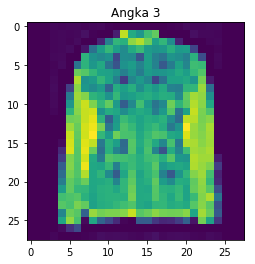

In [68]:
# membutuhkan beberapa class dari library matplotlib dengan tujuan melakukan visualisasi
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# mengizinkan matplotlib menggambar pada jupyter notebook
%matplotlib inline

# mengkonversi train dataset menjadi berformat (num_images, img_rows, img_cols) agar kita bisa plot mereka
xtrain_vis = xtrain_raw.values.reshape(num_train, dim, dim)

#tunjukkan gambar menggunakan pyplot
plt.imshow(xtrain_vis[5])                             #pilih data yang ingin di visualisasikan
plt.title("Angka {}".format(ytrain_raw[i]))           #tulis judul gambarnya
plt.show()                                            #tampilkan

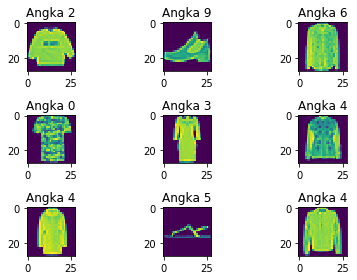

In [69]:
# berikut merupakan snippet program untuk melakukan visualisasi gambar dengan subplot

# plot 9 gambar pertama dalam xtrain_vis kita
for i in range(0,9):
    plt.subplot(3, 3, i+1)
    plt.imshow(xtrain_vis[i])
    plt.title("Angka {}".format(ytrain_raw[i]));

#supaya tampilannya enggak dempet2
plt.tight_layout()

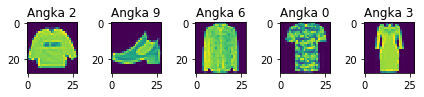

In [70]:
# plot 5 gambar pertama
for i in range(0,5):
    plt.subplot(1, 5, i+1)
    plt.imshow(xtrain_vis[i])
    plt.title("Angka {}".format(ytrain_raw[i]));

#supaya tampilannya enggak dempet2
plt.tight_layout()

## 1.5 Normalisasi
-- silahkan tuliskan analisa kalian

In [75]:
# normalisasikan data
xtrain_normalized = xtrain_raw / 255.0
xtest_normalized = xtest_raw / 255.0

xtrain_normalized.head(5)

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.019608,0.0,0.0,...,0.000000,0.0,0.0,0.117647,0.168627,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.003922,0.007843,0.0,0.0,0.000000,0.0,0.0,...,0.011765,0.0,0.0,0.000000,0.000000,0.003922,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0


## 1.6 Menyesuaikan Shape dari Dataset
-- silahkan tuliskan analisa kalian

In [77]:
#reshape variable kita menjadi (jumlah_data, dimensi-x, dimensi-y, 1)
#ingat, kita sudah menyimpan jumlah data didalam variable ntrain dan ntest
xtrain = xtrain_normalized.values.reshape(num_train, dim, dim, 1)
xtest = xtest_normalized.values.reshape(num_test, dim, dim, 1)

#cetak beberapa informasi yang kita butuhkan
print("Shape xtrain sebelum, pixel berbentuk vektor 1D:", xtrain_normalized.shape)
print("Shape xtrain sesudah, pixel berbentuk 28x28x1 3D matrix:", xtrain.shape)

print("\nShape test sebelum, pixel berbentuk vektor 1D:", test_normalized.shape)
print("Shape test sesudah, pixel berbentuk 28x28x1 3D matrix:", test.shape)

Shape xtrain sebelum, pixel berbentuk vektor 1D: (60000, 784)
Shape xtrain sesudah, pixel berbentuk 28x28x1 3D matrix: (60000, 28, 28, 1)

Shape test sebelum, pixel berbentuk vektor 1D: (10000, 785)
Shape test sesudah, pixel berbentuk 28x28x1 3D matrix: (10000, 785)


## 1.7 One-Hot Encoding
-- silahkan tuliskan analisa kalian

In [78]:
# class to_categorical kita butuhkan dari library keras
from keras.utils.np_utils import to_categorical

Using TensorFlow backend.


In [79]:
#nclasses = ytrain_raw.max() - ytrain_raw.min() + 1
nclasses = 10

#cetak bentuk ytrain sebelum
print("Tipe data ytrain sebelum : ", type(ytrain_raw))
print("Shape ytrain sebelum     : ", ytrain_raw.shape)

#melakukan one-hot encoding
ytrain = to_categorical(ytrain_raw, num_classes = nclasses)

#cetak bentuk ytrain sesudah
print("\nTipe data ytrain sesudah : ", type(ytrain))
print("Shape ytrain sesudah     : ", ytrain.shape)

Tipe data ytrain sebelum :  <class 'pandas.core.series.Series'>
Shape ytrain sebelum     :  (60000,)

Tipe data ytrain sesudah :  <class 'numpy.ndarray'>
Shape ytrain sesudah     :  (60000, 10)


In [80]:
#mencetak isinya, sebelum dan sesudah
print('Label encoding:')
print(ytrain_raw.values)

print('\nOne-hot encoding:')
print(ytrain)

Label encoding:
[2 9 6 ... 8 8 7]

One-hot encoding:
[[0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 1. 0. 0.]]


## 1.8 Memisahkan Data Training dan Data Validation
-- silahkan tuliskan analisa kalian

In [81]:
# menggunakan class train_test_split untuk melakukan pembagian secara otomatis
from sklearn.model_selection import train_test_split

# membuat class untuk melakukan random
seed = 2
np.random.seed(seed)

# kita pisahkan sebagian xtrain dan ytrain untuk xval dan yval
xtrain, xval, ytrain, yval = train_test_split(xtrain, ytrain,      #input xtrain dan ytrain kita
                                              test_size=0.1,       #presentase porsi untuk xval dan yval
                                              random_state=seed,   #gunakan class random kita agar train_test_split dapat secara random melakukan pemisahan xval dan yval
                                              shuffle=True,        #shuffle data sebelum melakukan pemisahan
                                             )

print('Bentuk xtrain sekarang : ', xtrain.shape)
print('Bentuk ytrain sekarang : ', ytrain.shape)
print('\nBentuk xval sekarang   : ', xval.shape)
print('Bentuk yval sekarang   : ', yval.shape)

Bentuk xtrain sekarang :  (54000, 28, 28, 1)
Bentuk ytrain sekarang :  (54000, 10)

Bentuk xval sekarang   :  (6000, 28, 28, 1)
Bentuk yval sekarang   :  (6000, 10)


<hr>

# 2. Convolutional Neural Network

Pada bagian ini Convolutional Neural Network akan dibangun; termasuk membangun arsitekturnya, menentukan optimizer, pengukuran kinerja, learning rate, dll.

In [82]:
from keras import backend as K

# for the architecture
from keras.models import Sequential
from keras.layers import Dense, Dropout, Lambda, Flatten, BatchNormalization
from keras.layers import Conv2D, MaxPool2D, AvgPool2D

# optimizer, data generator and learning rate reductor
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

In [85]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(5,5), padding='same', activation='relu', input_shape=(dim,dim,1)))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(filters=64, kernel_size=(5,5), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(120, activation='relu'))
model.add(Dense(84, activation='relu'))     
model.add(Dense(nclasses, activation='softmax'))

In [87]:
model.compile(optimizer="adam",                 
              loss="categorical_crossentropy", 
              metrics=["accuracy"])   

In [88]:
history = model.fit(
    xtrain, ytrain, 
    batch_size=512,
    epochs=5,
    verbose=1,
    validation_data=(xval, yval),
)

Train on 54000 samples, validate on 6000 samples
Epoch 1/5
54000/54000 [==============================] - 115s 2ms/step - loss: 0.7686 - acc: 0.7165 - val_loss: 0.4877 - val_acc: 0.8222
Epoch 2/5
54000/54000 [==============================] - 120s 2ms/step - loss: 0.4455 - acc: 0.8383 - val_loss: 0.3742 - val_acc: 0.8715
Epoch 3/5
54000/54000 [==============================] - 119s 2ms/step - loss: 0.3749 - acc: 0.8664 - val_loss: 0.3440 - val_acc: 0.8750
Epoch 4/5
54000/54000 [==============================] - 117s 2ms/step - loss: 0.3441 - acc: 0.8774 - val_loss: 0.3230 - val_acc: 0.8867
Epoch 5/5
54000/54000 [==============================] - 120s 2ms/step - loss: 0.3136 - acc: 0.8869 - val_loss: 0.3037 - val_acc: 0.8918


<hr>

# 3. Analisis Hasil
##  Melakukan Visualisasi / Plotting Loss dan Accuracy

-- silahkan tuliskan analisa kalian

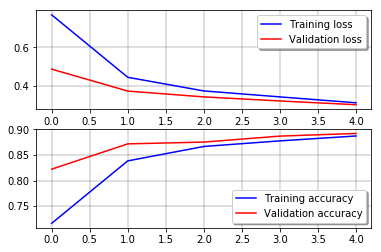

In [93]:
#plot perbandingan training loss dan validation loss
fig, ax = pl.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="Validation loss",axes =ax[0])
ax[0].grid(color='black', linestyle='-', linewidth=0.25)
legend = ax[0].legend(loc='best', shadow=True)

#plot perbandingan training acc dan validation acc
ax[1].plot(history.history['acc'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_acc'], color='r',label="Validation accuracy")
ax[1].grid(color='black', linestyle='-', linewidth=0.25)
legend = ax[1].legend(loc='best', shadow=True)

# Kesan dan Pesan untuk Kursus ini

silahkan tuliskan kesan dan pesan kalian

In [ ]:
Untuk kesannya, ilmunya berguna dari masing-masing tutor. Kesannya fasilitas internet di lab terkadang bermasalah.